In [14]:
!wget  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2023-03-12 20:46:22--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt.1’

input.txt.1         100%[===================>]   1.06M  --.-KB/s    in 0.04s   

2023-03-12 20:46:23 (29.4 MB/s) - ‘input.txt.1’ saved [1115394/1115394]



In [97]:
with open('input.txt', 'r', encoding='utf-8') as f:
  text = f.read()

In [98]:
print("length of data set in characters: ", len(text))

length of data set in characters:  1115394


In [99]:
print(text[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [100]:
# unique character occurred in text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [101]:
# create a mapping from characters to integers
stoi = {ch:i for i,ch in enumerate(chars)}
itos = {i:ch for i,ch in enumerate(chars)}
# encoder : take a string return a list of integer
encode = lambda s : [stoi[c] for c in s]
#decoder : take a list of integer and return a string
decode = lambda l: ''.join([itos[i] for i in l])

print(encode('hi there'))
print(decode(encode('hi there')))

[46, 47, 1, 58, 46, 43, 56, 43]
hi there


In [102]:
# lets encode the complete shakespere and store it in tensor
import torch
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:100])

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59])


In [103]:
# lets separate the dataset into train and test set
partition_point = int(0.9*data.shape[0])
train_data = data[:partition_point]
val_data = data[partition_point:]

In [104]:
block_size = 8
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [105]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
  context = x[:t+1]
  target = y[t]
  print(f"when input is {context} output is {target}")

when input is tensor([18]) output is 47
when input is tensor([18, 47]) output is 56
when input is tensor([18, 47, 56]) output is 57
when input is tensor([18, 47, 56, 57]) output is 58
when input is tensor([18, 47, 56, 57, 58]) output is 1
when input is tensor([18, 47, 56, 57, 58,  1]) output is 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) output is 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) output is 58


In [107]:
torch.manual_seed(1337)
batch_size = 4
block_size = 8

def get_batch(split):
  data = train_data if split == 'train' else val_data
  ix = torch.randint(len(data) - block_size, (batch_size,))
  x= torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+1+block_size] for i in ix])
  return x,y

xb,yb=get_batch('train')
print(f"inputs: {xb.shape} targets: {yb.shape}")
print(f"inputs: \n{xb} \ntargets: \n{yb}")

print('-----')

for b in range(batch_size):
  for t in range(block_size):
    context = xb[b,:t+1]
    target = yb[b, t]
    print(f"when input is {context.tolist()} output is {target}")

inputs: torch.Size([4, 8]) targets: torch.Size([4, 8])
inputs: 
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]]) 
targets: 
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
-----
when input is [24] output is 43
when input is [24, 43] output is 58
when input is [24, 43, 58] output is 5
when input is [24, 43, 58, 5] output is 57
when input is [24, 43, 58, 5, 57] output is 1
when input is [24, 43, 58, 5, 57, 1] output is 46
when input is [24, 43, 58, 5, 57, 1, 46] output is 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] output is 39
when input is [44] output is 53
when input is [44, 53] output is 56
when input is [44, 53, 56] output is 1
when input is [44, 53, 56, 1] output is 58
when input is [44, 53, 56, 1, 58] output is 46
when input is [44, 53, 56,

In [25]:
# reset a variable
#%reset_selective -f len
# reset all variables
#%reset

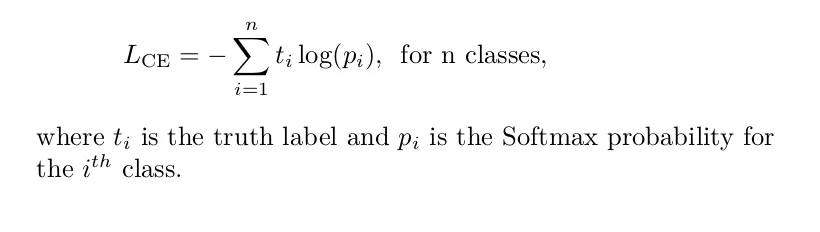

In [111]:
# BiGram language model
import torch
import torch.nn as nn
import math
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):
  def __init__(self, vocab_size):
    super().__init__()
    # create a embedding table of dimension vocab_size
    self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)
    # we will learn the probability of next character in ith channel hence hidden_size==vocab_size
  
  def forward(self, idx, targets = None):
    #size idx (B,T) Batch,Time,Channel
    logits = self.token_embedding_table(idx) # (B,T,C)
    if targets == None:
      loss = None
    else:
      B,T,C = logits.shape
      logits = logits.view(B*T, C)
      targets = targets.view(B*T)
      loss = F.cross_entropy(logits, targets) # expects (B,C,T)
    return logits, loss
  
  def generate(self, idx, max_new_tokens):
    for _ in range(max_new_tokens):
      logits,_ = self(idx) #(B,T,C)
      logits = logits[:,-1,:] #(B,C)
      prob = F.softmax(logits, dim=-1)
      idx_next = torch.multinomial(prob, num_samples=1) #(B,1)
      idx = torch.cat((idx, idx_next), dim=1) #(B,T+1)
    return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)

print(f"expected loss {-math.log(1/vocab_size)} actual loss {loss}")
idx = torch.zeros((1,1), dtype=torch.long)
print(decode(m.generate(idx, max_new_tokens=100)[0].tolist()))

torch.Size([32, 65])
expected loss 4.174387269895637 actual loss 4.878634929656982

SKIcLT;AcELMoTbvZv C?nq-QE33:CJqkOKH-q;:la!oiywkHjgChzbQ?u!3bLIgwevmyFJGUGp
wnYWmnxKWWev-tDqXErVKLgJ


In [112]:
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [113]:
batch_size = 32
for steps in range(10000):
  xb, yb = get_batch('train')
  logits, loss = m(xb, yb)
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()
  if steps % 1000 == 0:
    print(loss.item())

4.692410945892334
3.7637593746185303
3.2342259883880615
2.892245292663574
2.703908681869507
2.5153486728668213
2.4889943599700928
2.514069080352783
2.444497585296631
2.3975775241851807


In [114]:
print(decode(m.generate(idx, max_new_tokens=400)[0].tolist()))


lso br. ave aviasurf my, yxMPZI ivee iuedrd whar ksth y h bora s be hese, woweee; the! KI 'de, ulseecherd d o blllando;LUCEO, oraingofof win!
RIfans picspeserer hee tha,
TOFonk? me ain ckntoty ded. bo'llll st ta d:
ELIS me hurf lal y, ma dus pe athouo
BEY:! Indy; by s afreanoo adicererupa anse tecorro llaus a!
OLeneerithesinthengove fal amas trr
TI ar I t, mes, n IUSt my w, fredeeyove
THek' merer,


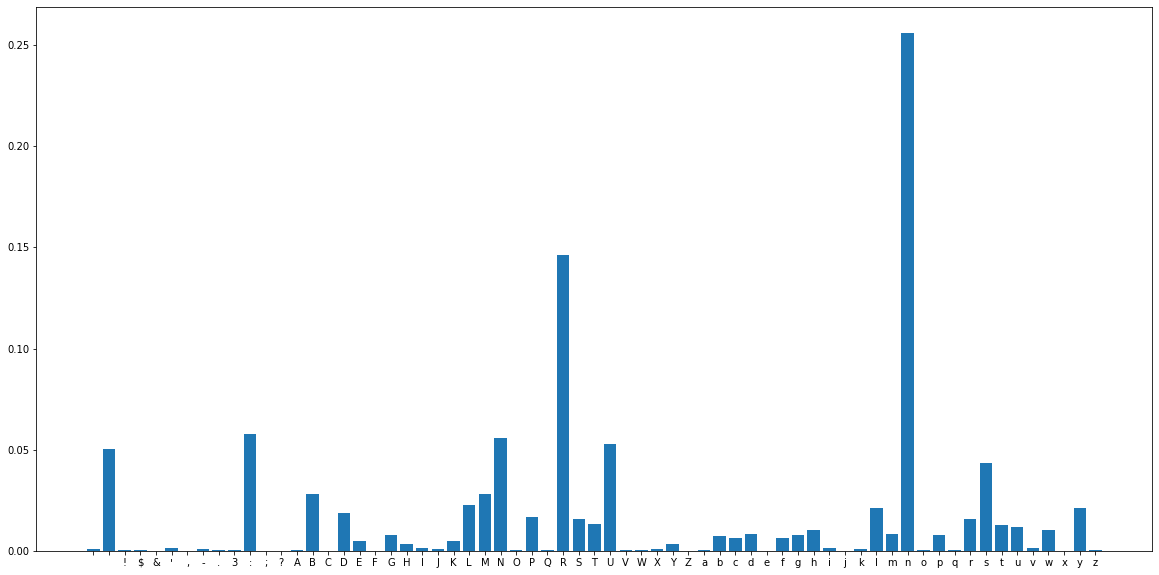

In [115]:
# visualize the learnt bigram model, show the probabilities for next characters
import matplotlib.pyplot as plt
import numpy as np
def softmax(x):
  exp_x = np.exp(x)
  return exp_x/np.sum(exp_x)
example = encode('A')
context = torch.tensor(example)
context = context.view(-1,1)
logits,_ = m(context)
weights = softmax(logits[0][0].tolist())

fig = plt.figure(figsize = (20,10))
x = [i for i in range(65)]
plt.bar(x, weights)
#plt.barh(x, weights)


characters = decode(x)
plt.xticks(x, characters)
plt.show()



